# Food Recommendation

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
from nltk import FreqDist
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
food = pd.read_csv("/content/food.csv")
ratings = pd.read_csv("/content/ratings.csv")

In [ ]:
print(food.shape)
print(ratings.shape)

(400, 5)
(512, 3)


## Food Analysis

### Statistics

In [ ]:
food.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


In [ ]:
food.describe()

,Food_ID
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


### Visualization

In [ ]:
# Frequency distribution of the words in the Name column
words = {}
stemmer = PorterStemmer()
for i in range(len(food)):
  name = food.loc[i, "Name"]
  tokenized = word_tokenize(name)
  for word in tokenized:
    stemmed = stemmer.stem(word)
    if not stemmed in words:
      words[stemmed] = 0
    words[stemmed] += 1

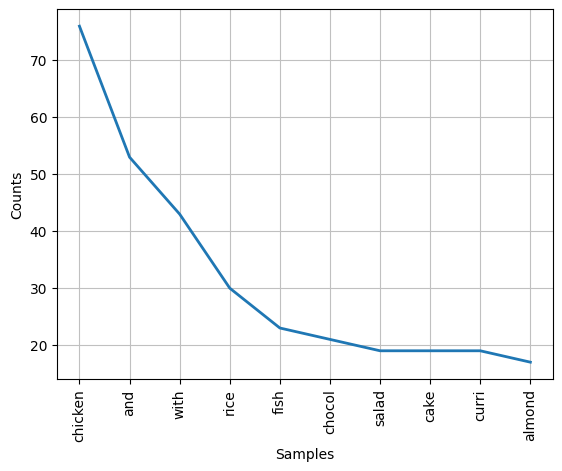

In [ ]:
freq_dist = FreqDist(words)
k = 10
freq_dist.plot(k)
plt.show()

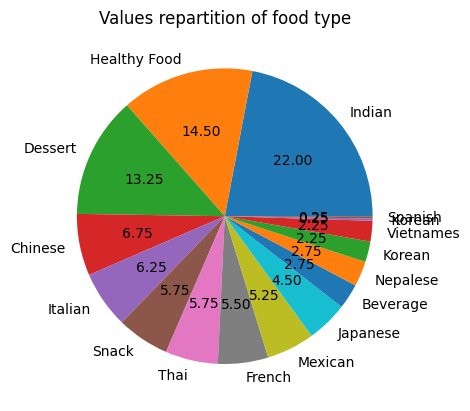

In [ ]:
plt.pie(food['C_Type'].value_counts(), labels=food['C_Type'].value_counts().index, autopct='%.2f')
plt.title("Values repartition of food type")
plt.show()

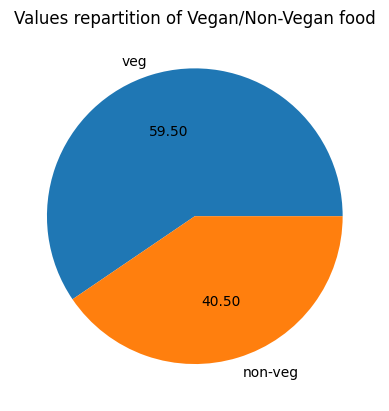

In [ ]:
plt.pie(food['Veg_Non'].value_counts(), labels=food['Veg_Non'].value_counts().index, autopct='%.2f')
plt.title("Values repartition of Vegan/Non-Vegan food")
plt.show()

In [ ]:
# Same than Name but for Describe column
descriptions = {}
stemmer = PorterStemmer()
for i in range(len(food)):
  desc = food.loc[i, "Describe"]
  tokenized = desc.split(",")
  for word in tokenized:
    stemmed = stemmer.stem(word.strip())
    if not stemmed in descriptions:
      descriptions[stemmed] = 0
    descriptions[stemmed] += 1

[('salt', 199), ('onion', 97), ('garlic', 67), ('oil', 66), ('sugar', 62), ('ginger', 59), ('butter', 55), ('egg', 53), ('olive oil', 50), ('water', 50)]


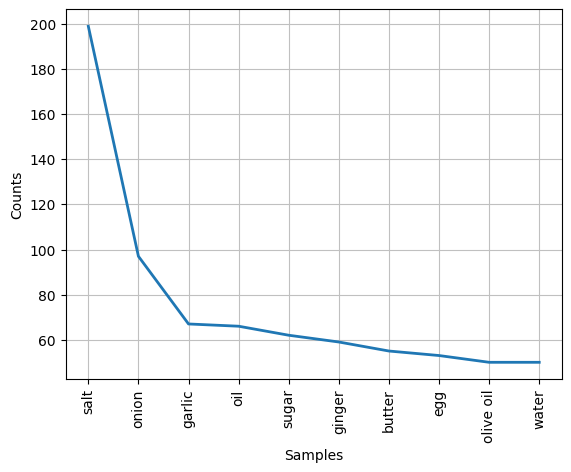

In [ ]:
freq_dist = FreqDist(descriptions)
k = 10
print(freq_dist.most_common(k))
freq_dist.plot(k)
plt.show()

## Ratings Analysis

### Statistics

In [ ]:
ratings.head()

,User_ID,Food_ID,Rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0


In [ ]:
ratings.describe()

,User_ID,Food_ID,Rating
count,511.000000,511.000000,511.000000
mean,49.068493,125.311155,5.438356
std,28.739213,91.292629,2.866236
min,1.000000,1.000000,1.000000
25%,25.000000,45.500000,3.000000
50%,49.000000,111.000000,5.000000
75%,72.000000,204.000000,8.000000
max,100.000000,309.000000,10.000000


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  511 non-null    float64
 1   Food_ID  511 non-null    float64
 2   Rating   511 non-null    float64
dtypes: float64(3)
memory usage: 12.1 KB


### Visualization

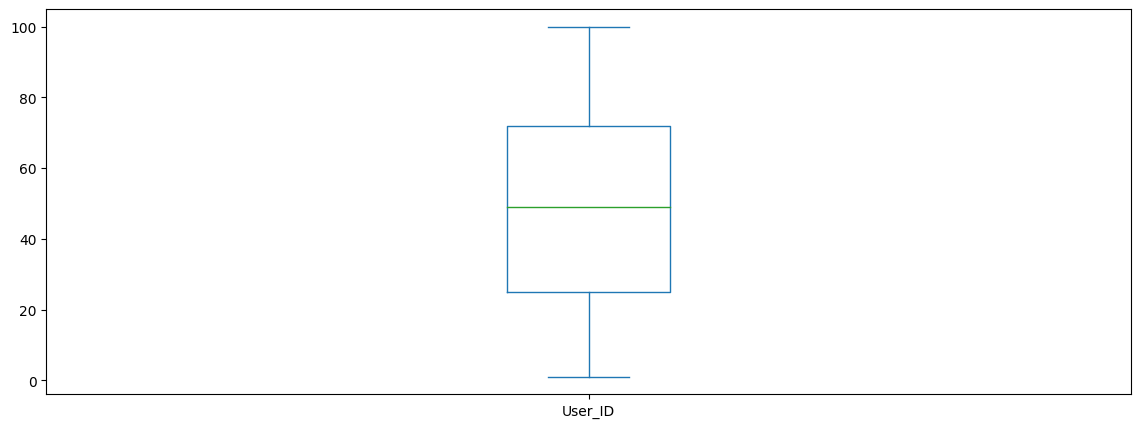

In [ ]:
ratings["User_ID"].plot(kind='box', figsize=(14, 5))
plt.show()

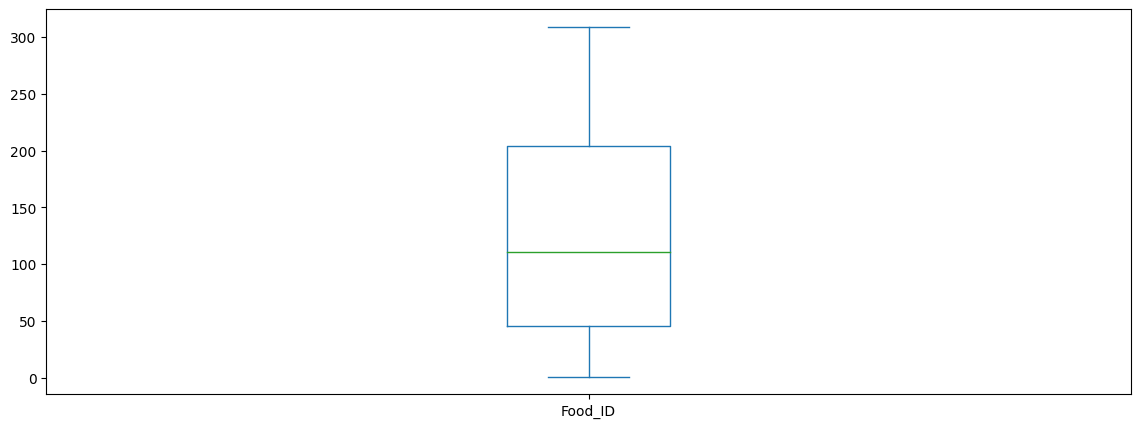

In [ ]:
ratings["Food_ID"].plot(kind='box', figsize=(14, 5))
plt.show()

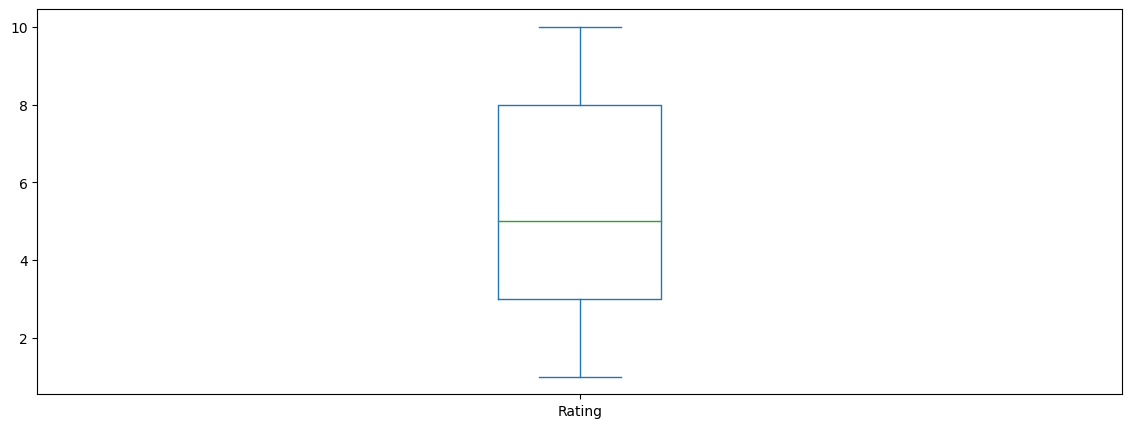

In [ ]:
ratings["Rating"].plot(kind='box', figsize=(14, 5))
plt.show()

## Feature engineering

In this step, we aim to add new features. Indeed, the column `Describe` of the food dataset lists several ingredients and we'd like to create binary columns for each of the ingredients. This implementation is also valid with the column `C_Type` and will be done later in this notebook.

In [ ]:
_food = food.copy()

unique_ingredients = descriptions.keys()

# for each ingredient, create a new column filled by 0 or 1
# if the ingredient is in the recipe.
def has_ingredient(x, ingredient):
  if ingredient in x:
    return 1
  return 0

for ingredient in unique_ingredients:
  _food[f"_{'_'.join(ingredient.split(' '))}"] = food["Describe"].apply(lambda x: has_ingredient(x, ingredient.strip()))

<ipython-input-92-d9ea4ed9352b>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  _food[f"_{'_'.join(ingredient.split(' '))}"] = food["Describe"].apply(lambda x: has_ingredient(x, ingredient.strip()))
<ipython-input-92-d9ea4ed9352b>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  _food[f"_{'_'.join(ingredient.split(' '))}"] = food["Describe"].apply(lambda x: has_ingredient(x, ingredient.strip()))
<ipython-input-92-d9ea4ed9352b>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

In [ ]:
_food['Veg_Non'] = _food['Veg_Non'].apply(lambda x: 1 if x=="veg" else 0)

In [ ]:
_food

,Food_ID,Name,C_Type,Veg_Non,Describe,_white_balsamic_vinegar,_lemon_juic,_lemon_rind,_red_chilli,_garlic_cloves_(crushed),...,_coarse_sea_salt,_chopped_kimchi,_country-style_bread,_cilantro_leav,_poblano_chil,_shrip,_red_salsa,_corn_tortilla,_anchovy_fillet,_penne_pasta
0,1,summer squash salad,Healthy Food,1,"white balsamic vinegar, lemon juice, lemon rin...",1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,chicken minced salad,Healthy Food,0,"olive oil, chicken mince, garlic (minced), oni...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,sweet chilli almonds,Snack,1,"almonds whole, egg white, curry leaves, salt, ...",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,tricolour salad,Healthy Food,1,"vinegar, honey/sugar, soy sauce, salt, garlic ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,christmas cake,Dessert,1,"christmas dry fruits (pre-soaked), orange zest...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,Kimchi Toast,Korean,1,"cream cheese, chopped kimchi, scallions,count...",0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
396,397,"Tacos de Gobernador (Shrimp, Poblano, and Chee...",Mexican,0,"poblano chiles, bacon, shrips, red salsa, garl...",0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0
397,398,Melted Broccoli Pasta With Capers and Anchovies,French,0,"broccoli,Bread Crumbs, anchovy fillets, garli...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
398,399,Lemon-Ginger Cake with Pistachios,Dessert,0,"egg yolks,lemon juice, unsalted butter, all pu...",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(_food["C_Type"])

,Korean,Beverage,Chinese,Dessert,French,Healthy Food,Indian,Italian,Japanese,Korean,Mexican,Nepalese,Snack,Spanish,Thai,Vietnames
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
397,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
398,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
